In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
rng = np.random.RandomState(0)
X, y, coef = make_regression(n_samples=10000,
                             n_features=100,
                             n_informative=40,
                             effective_rank=15,
                             random_state=0,
                             noise=4.0,
                             bias=100.0,
                             coef=True
                            )

In [3]:
# Shrink dependent variable to (0,1)
y_min = min(y)
y = [i-y_min for i in y]
y_max = max(y)
y = [i/y_max for i in y]

/home/kt12/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kt12/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


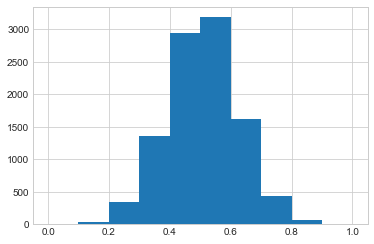

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

plt.hist(y);

In [6]:
import statsmodels.api as sm

/home/kt12/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kt12/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
linear_glm = sm.GLM(y, X)
linear_result = linear_glm.fit()

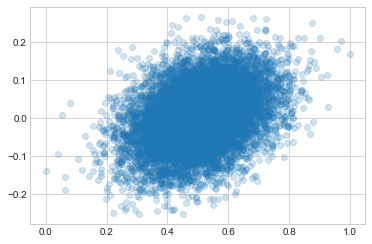

In [8]:
plt.plot(y, linear_result.predict(X), 'o', alpha=0.2);

In [9]:
# Apply GLM with logit link
binom_glm = sm.GLM(y, X, family=sm.families.Binomial())
binom_results = binom_glm.fit()

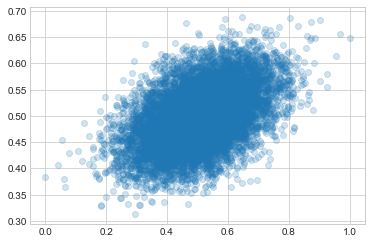

In [10]:
plt.plot(y, binom_results.predict(X), 'o', alpha=0.2);

In [11]:
%load_ext watermark

In [14]:
%watermark -v -m -p numpy,matplotlib,sklearn,seaborn,statsmodels

CPython 3.6.5
IPython 6.3.1

numpy 1.14.2
matplotlib 2.2.2
sklearn 0.19.1
seaborn 0.8.1
statsmodels 0.8.0

compiler   : GCC 7.2.0
system     : Linux
release    : 4.4.0-122-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
